# Mushroom Tasty or not

In [21]:
import chainer as ch
from chainer import datasets
import chainer.functions as F
import chainer.links as L
from chainer import training
from chainer.training import extensions

import numpy as np

import matplotlib
matplotlib.use('Agg')

In [4]:
mushroomsfile = 'mushrooms.csv'
data_array = np.genfromtxt(
    mushroomsfile, delimiter=',', dtype=str, skip_header=1)
for col in range(data_array.shape[1]):
    data_array[:, col] = np.unique(data_array[:, col], return_inverse=True)[1]

X = data_array[:, 1:].astype(np.float32)
Y = data_array[:, 0].astype(np.int32)[:, None]
train, test = datasets.split_dataset_random(
    datasets.TupleDataset(X, Y), int(data_array.shape[0] * .7))


In [5]:
train_iter = ch.iterators.SerialIterator(train, 100)
test_iter = ch.iterators.SerialIterator(
    test, 100, repeat=False, shuffle=False)

In [6]:
def MLP(n_units, n_out):
    layer = ch.Sequential(L.Linear(n_units), F.relu)
    model = layer.repeat(2)
    model.append(L.Linear(n_out))

    return model

In [7]:
model = L.Classifier(
    MLP(44, 1), lossfun=F.sigmoid_cross_entropy, accfun=F.binary_accuracy)

In [8]:
optimizer = ch.optimizers.SGD().setup(model)

In [20]:
updater = training.StandardUpdater(train_iter, optimizer, device=-1)
trainer = training.Trainer(updater, (50, 'epoch'), out='result')
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.snapshot(), trigger=(20, 'epoch'))
trainer.extend(extensions.LogReport())

In [15]:
if extensions.PlotReport.available():
    trainer.extend(
        extensions.PlotReport(['main/loss', 'validation/main/loss'],
                              'epoch', file_name='loss.png'))
    trainer.extend(
        extensions.PlotReport(
            ['main/accuracy', 'validation/main/accuracy'],
            'epoch', file_name='accuracy.png'))

In [16]:
trainer.extend(extensions.PrintReport(
    ['epoch', 'main/loss', 'validation/main/loss',
     'main/accuracy', 'validation/main/accuracy', 'elapsed_time']))

In [17]:
#  Run the training
trainer.run()

epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
1           0.613984    0.533301              0.673509       0.747768                  8.85823       
2           0.484818    0.445735              0.782632       0.832589                  9.6531        
3           0.416652    0.38426               0.840702       0.855789                  10.5495       
4           0.371656    0.353127              0.867895       0.868295                  11.3597       
5           0.33562     0.329741              0.883158       0.891495                  12.2332       
6           0.312917    0.298157              0.894912       0.900547                  13.2255       
7           0.293941    0.282474              0.900351       0.906947                  14.1402       
8           0.281416    0.269736              0.905179       0.912947                  15.0144       
9           0.269982    0.268086              0.909123       0.914                  

In [18]:
x, t = test[np.random.randint(len(test))]

predict = model.predictor(x[None]).array
predict = predict[0][0]

if predict >= 0:
    print('Predicted Poisonous, Actual ' + ['Edible', 'Poisonous'][t[0]])
else:
    print('Predicted Edible, Actual ' + ['Edible', 'Poisonous'][t[0]])

Predicted Edible, Actual Edible


# MNIST 

In [25]:
from chainer.datasets import mnist

train_val, test = mnist.get_mnist(withlabel=True, ndim=1)

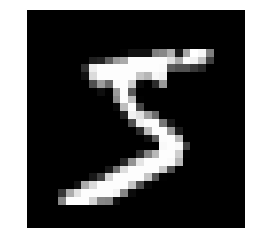

label: 5


In [26]:
# matplotlibを使ったグラフ描画結果がnotebook内に表示されるようにします。
%matplotlib inline
import matplotlib.pyplot as plt

# データの例示
x, t = train_val[0]  # 0番目の (data, label) を取り出す
plt.imshow(x.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()
print('label:', t)

In [27]:
from chainer.datasets import split_dataset_random

train, valid = split_dataset_random(train_val, 50000, seed=0)

In [29]:
print('Training dataset size:', len(train))
print('Validation dataset size:', len(valid))

Training dataset size: 50000
Validation dataset size: 10000


In [30]:
from chainer import iterators

batchsize = 128

train_iter = iterators.SerialIterator(train, batchsize)
valid_iter = iterators.SerialIterator(
    valid, batchsize, repeat=False, shuffle=False)
test_iter = iterators.SerialIterator(
    test, batchsize, repeat=False, shuffle=False)

In [31]:
import chainer.links as L
import chainer.functions as F

In [32]:
import random
import numpy
import chainer

def reset_seed(seed=0):
    random.seed(seed)
    numpy.random.seed(seed)
    if chainer.cuda.available:
        chainer.cuda.cupy.random.seed(seed)

reset_seed(0)

In [34]:
import chainer
import chainer.links as L
import chainer.functions as F

class MLP(chainer.Chain):

    def __init__(self, n_mid_units=100, n_out=10):
        super(MLP, self).__init__()

        # パラメータを持つ層の登録
        with self.init_scope():
            self.l1 = L.Linear(None, n_mid_units)
            self.l2 = L.Linear(n_mid_units, n_mid_units)
            self.l3 = L.Linear(n_mid_units, n_out)

    def __call__(self, x):
        # データを受け取った際のforward計算を書く
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)

gpu_id = -1  # CPUを用いる場合は、この値を-1にしてください

net = MLP()

if gpu_id >= 0:
    net.to_gpu(gpu_id)


In [35]:
print('1つ目の全結合層のバイアスパラメータの形は、', net.l1.b.shape)
print('初期化直後のその値は、', net.l1.b.array)

1つ目の全結合層のバイアスパラメータの形は、 (100,)
初期化直後のその値は、 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [36]:
print(net.l1.W.array)

None


In [37]:
from chainer import optimizers

optimizer = optimizers.SGD(lr=0.01).setup(net)

In [38]:
import numpy as np
from chainer.dataset import concat_examples
from chainer.cuda import to_cpu

max_epoch = 10

while train_iter.epoch < max_epoch:

    # ---------- 学習の1イテレーション ----------
    train_batch = train_iter.next()
    x, t = concat_examples(train_batch, gpu_id)

    # 予測値の計算
    y = net(x)

    # ロスの計算
    loss = F.softmax_cross_entropy(y, t)

    # 勾配の計算
    net.cleargrads()
    loss.backward()

    # パラメータの更新
    optimizer.update()


In [39]:
if train_iter.is_new_epoch:  # 1 epochが終わったら

        # ロスの表示
        print('epoch:{:02d} train_loss:{:.04f} '.format(
            train_iter.epoch, float(to_cpu(loss.data))), end='')

        valid_losses = []
        valid_accuracies = []
        while True:
            valid_batch = valid_iter.next()
            x_valid, t_valid = concat_examples(valid_batch, gpu_id)

            # Validationデータをforward
            with chainer.using_config('train', False), \
                    chainer.using_config('enable_backprop', False):
                y_valid = net(x_valid)

            # ロスを計算
            loss_valid = F.softmax_cross_entropy(y_valid, t_valid)
            valid_losses.append(to_cpu(loss_valid.array))

            # 精度を計算
            accuracy = F.accuracy(y_valid, t_valid)
            accuracy.to_cpu()
            valid_accuracies.append(accuracy.array)

            if valid_iter.is_new_epoch:
                valid_iter.reset()
                break

        print('val_loss:{:.04f} val_accuracy:{:.04f}'.format(
            np.mean(valid_losses), np.mean(valid_accuracies)))

# テストデータでの評価
test_accuracies = []
while True:
    test_batch = test_iter.next()
    x_test, t_test = concat_examples(test_batch, gpu_id)

    # テストデータをforward
    with chainer.using_config('train', False), \
            chainer.using_config('enable_backprop', False):
        y_test = net(x_test)

    # 精度を計算
    accuracy = F.accuracy(y_test, t_test)
    accuracy.to_cpu()
    test_accuracies.append(accuracy.array)

    if test_iter.is_new_epoch:
        test_iter.reset()
        break

print('test_accuracy:{:.04f}'.format(np.mean(test_accuracies)))

epoch:10 train_loss:0.2981 val_loss:0.2735 val_accuracy:0.9235
test_accuracy:0.9269


In [ ]:
with chainer.using_config('train', False):
